In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.io import mmread

In [10]:
spatial_locs = pd.read_csv("/Users/andrewjones/Documents/beehive/spatial_stitching/data/visium_mouse_brain/spatial/tissue_positions_list.csv", header=None)
spatial_locs.columns = ['barcode', 'in_tissue', 'array_row', 'array_col', 'col_pxl', 'row_pxl']

In [11]:
spatial_locs

,barcode,in_tissue,array_row,array_col,col_pxl,row_pxl
0,ACGCCTGACACGCGCT-1,0,0,0,1251,1210
1,TACCGATCCAACACTT-1,0,1,1,1371,1279
2,ATTAAAGCGGACGAGC-1,0,0,2,1251,1348
3,GATAAGGGACGATTAG-1,0,1,3,1371,1417
4,GTGCAAATCACCAATA-1,0,0,4,1251,1486
...,...,...,...,...,...,...
4987,GAACGTTTGTATCCAC-1,0,77,123,10469,9674
4988,ATTGAATTCCCTGTAG-1,0,76,124,10350,9742
4989,TACCTCACCAATTGTA-1,0,77,125,10469,9811
4990,AGTCGAATTAGCGTAA-1,0,76,126,10350,9880


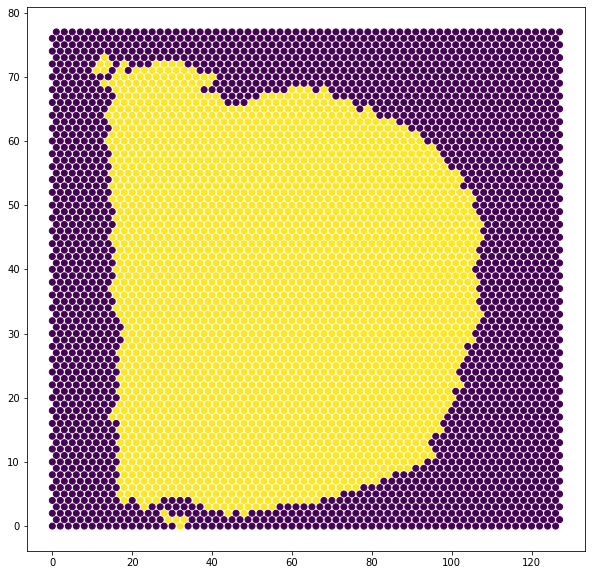

In [20]:
plt.figure(figsize=(10, 10))
plt.scatter(spatial_locs.array_col, spatial_locs.array_row, c=spatial_locs.in_tissue)

In [24]:
data = mmread("/Users/andrewjones/Documents/beehive/spatial_stitching/data/visium_mouse_brain/raw_feature_bc_matrix/matrix.mtx").toarray()

In [25]:
genes = pd.read_table("/Users/andrewjones/Documents/beehive/spatial_stitching/data/visium_mouse_brain/raw_feature_bc_matrix/features.tsv", header=None)
barcodes = pd.read_table("/Users/andrewjones/Documents/beehive/spatial_stitching/data/visium_mouse_brain/raw_feature_bc_matrix/barcodes.tsv", header=None)

In [36]:
data_df = pd.DataFrame(data, index=genes.iloc[:, 0], columns=barcodes.iloc[:, 0])
data.shape, genes.shape, barcodes.shape

((32285, 4992), (32285, 3), (4992, 1))

In [51]:
# Align spatial coordinates and expression
sorted_idx = np.argsort(spatial_locs.barcode.values)
sorted_barcodes = spatial_locs.barcode.values[sorted_idx]
spatial_locs_aligned = spatial_locs.iloc[sorted_idx, :]

data_df_aligned = data_df[sorted_barcodes]

assert np.all(data_df_aligned.columns.values == spatial_locs_aligned.barcode.values)

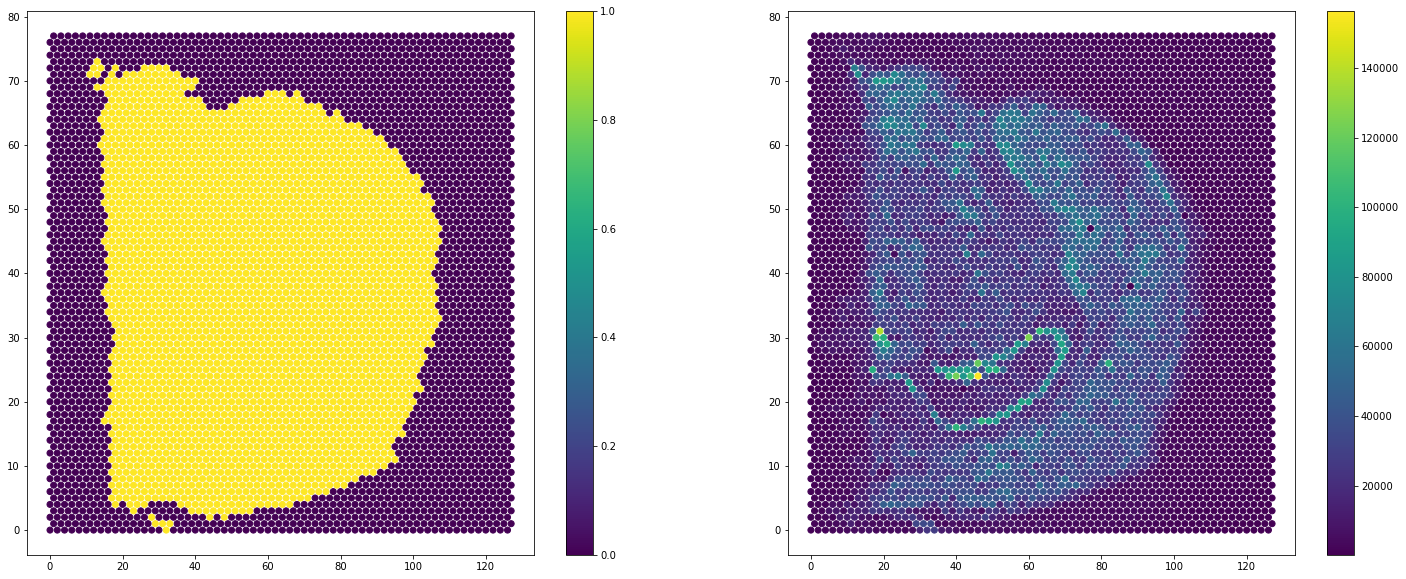

In [60]:
plt.figure(figsize=(25, 10))
plt.subplot(121)
plt.scatter(spatial_locs_aligned.array_col, spatial_locs_aligned.array_row, c=spatial_locs_aligned.in_tissue)
plt.colorbar()
plt.subplot(122)
plt.scatter(spatial_locs_aligned.array_col, spatial_locs_aligned.array_row, c=data_df_aligned.sum(0))
plt.colorbar()
plt.show()

In [43]:
spatial_locs.head()


,barcode,in_tissue,array_row,array_col,col_pxl,row_pxl
0,ACGCCTGACACGCGCT-1,0,0,0,1251,1210
1,TACCGATCCAACACTT-1,0,1,1,1371,1279
2,ATTAAAGCGGACGAGC-1,0,0,2,1251,1348
3,GATAAGGGACGATTAG-1,0,1,3,1371,1417
4,GTGCAAATCACCAATA-1,0,0,4,1251,1486


In [44]:
spatial_locs.barcode.values == data_df.columns.values

array([False, False, False, ..., False, False, False])

In [61]:
## SLIDE-SEQ


In [63]:
slideseq_counts = pd.read_csv("./data/slideseq/Puck_180819_11/MappedDGEForR.csv")

In [64]:
slideseq_locs = pd.read_csv("./data/slideseq/Puck_180819_11/BeadLocationsForR.csv")

In [73]:
slideseq_counts.shape, slideseq_locs.shape

((19130, 29276), (29275, 3))

In [76]:
counts_per_bead = slideseq_counts.iloc[:, 1:].sum(0)

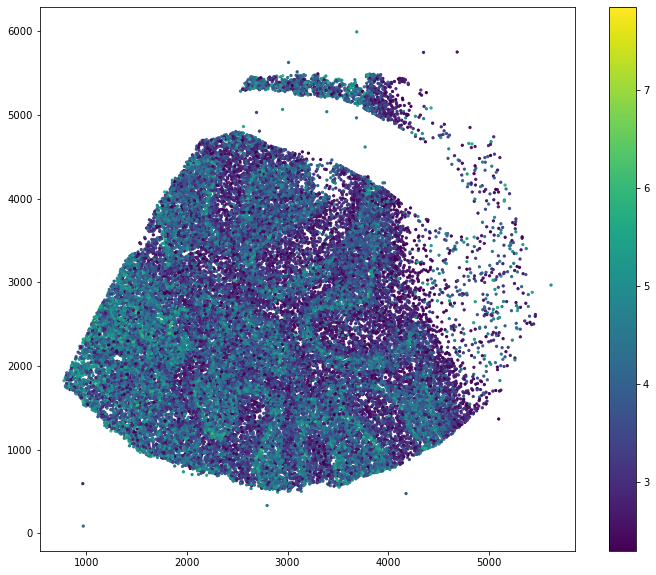

In [87]:
plt.figure(figsize=(12, 10))
plt.scatter(slideseq_locs.xcoord.values, slideseq_locs.ycoord.values, c=np.log(counts_per_bead), s=5)
plt.colorbar()
plt.show()